# Part 1: Feature Engineering

In [1]:
import pandas as pd
import zipfile

zip_path = "Facebook.zip"
encoding_options = ['utf-8', 'latin1', 'ISO-8859-1']
all_dfs = []

with zipfile.ZipFile(zip_path, 'r') as z:
    for file_name in z.namelist():
        if file_name.endswith(".csv") and "Features" in file_name:
            for enc in encoding_options:
                try:
                    with z.open(file_name) as f:
                        df = pd.read_csv(f, encoding=enc, header=None)
                        df['source_file'] = file_name.split("/")[-1]
                        all_dfs.append(df)
                        break
                except Exception:
                    continue

combined_df = pd.concat(all_dfs, ignore_index=True)
column_names = ["Page total likes", "Type", "Category", "Post Month", "Post Weekday", "Post Hour",
    "Paid", "Lifetime Post Total Reach", "Lifetime Post Total Impressions",
    "Lifetime Engaged Users", "Lifetime Post Consumers", "Lifetime Post Consumptions",
    "Lifetime Post Impressions by people who have liked your Page",
    "Lifetime Post reach by people who like your Page",
    "Lifetime People who have liked your Page and engaged with your post",
    "comment", "like", "share", "Total Interactions",
    "Post Promotion Status", "H Local post reach", "H Local post impressions",
    "H Engaged users", "H Post consumers", "H Post consumptions",
    "H Impressions by people who have liked your Page",
    "H Reach by people who like your Page",
    "H People who have liked your Page and engaged with your post",
    "L Lifetime post total reach", "L Lifetime post total impressions",
    "L Engaged users", "L Post consumers", "L Post consumptions",
    "L Impressions by people who have liked your Page",
    "L Reach by people who like your Page",
    "L People who have liked your Page and engaged with your post",
    "L comment", "L like", "L share",
    "Base Time", "Post length", "Post Share Count", "Post Promotion Status 2",
    "Target Type", "Type_1", "Type_2", "Type_3",
    "Category_1", "Category_2", "Category_3",
    "Weekday_1", "Weekday_2", "Weekday_3", "Weekday_4",
    "source_file"
]
combined_df.columns = column_names + [f"extra_{i}" for i in range(combined_df.shape[1] - len(column_names))]
combined_df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Type_2,Type_3,Category_1,Category_2,Category_3,Weekday_1,Weekday_2,Weekday_3,Weekday_4,source_file
0,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Features_TestSet.csv
1,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Features_TestSet.csv
2,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Features_TestSet.csv
3,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Features_TestSet.csv
4,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Features_TestSet.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612858,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,Features_Variant_5.csv
612859,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,Features_Variant_5.csv
612860,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,Features_Variant_5.csv
612861,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,Features_Variant_5.csv


In [2]:
import numpy as np

df = combined_df.copy()
df['log_comment'] = np.log1p(df['comment'])
df['is_photo'] = df['Type'].apply(lambda x: 1 if x == 1 else 0)

# Time Features
df['is_weekend'] = df['Post Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df['time_slot'] = pd.cut(df['Post Hour'], bins=[-1,6,12,18,24], labels=["Late Night", "Morning", "Afternoon", "Evening"])
# Behavior Features
df['engagement_total'] = df['comment'] + df['like'] + df['share']
df['engagement_rate'] = df['engagement_total'] / df['Page total likes']
df['is_paid'] = df['Paid'].apply(lambda x: 1 if x > 0 else 0)

df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Weekday_3,Weekday_4,source_file,log_comment,is_photo,is_weekend,time_slot,engagement_total,engagement_rate,is_paid
0,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,1.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
1,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
2,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
3,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
4,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,1.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612858,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,42.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612859,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,51.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612860,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,17.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612861,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,21.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1


# Part 2: EDA Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid")
matplotlib.rcParams['font.family'] = 'SimHei' 
matplotlib.rcParams['axes.unicode_minus'] = False

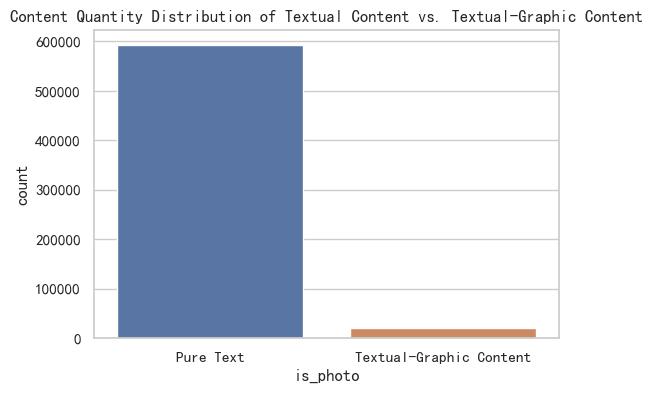

In [4]:
# Statistics of A/B Group Quantity
plt.figure(figsize=(6, 4))
sns.countplot(x='is_photo', data=df)
plt.title("Content Quantity Distribution of Textual Content vs. Textual-Graphic Content")
plt.xticks([0, 1], ['Pure Text', 'Textual-Graphic Content'])
plt.show()

> The chart shows that the content of graphics and text only constitutes a very small portion of the overall sample, while the proportion of text content exceeds 95%. This indicates a serious imbalance between the two types of content, and it is necessary to introduce control or matching (such as PSM) in subsequent regression or causal analysis to ensure fair comparison.

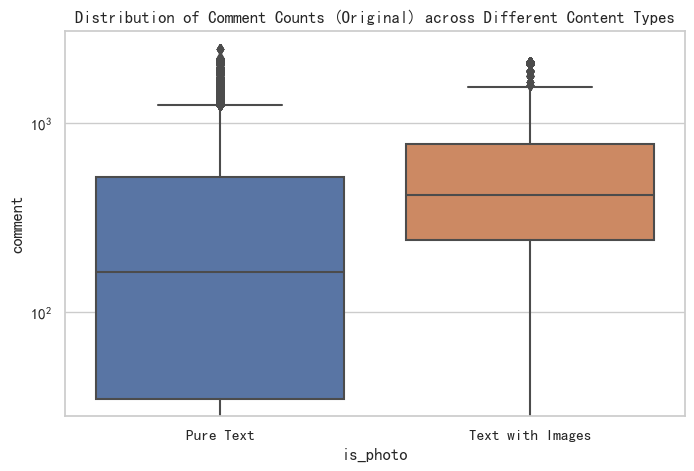

In [5]:
# Comparison of Comment Counts (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_photo', y='comment', data=df)
plt.yscale('log')
plt.title("Distribution of Comment Counts (Original) across Different Content Types")
plt.xticks([0, 1], ['Pure Text', 'Text with Images'])
plt.show()

> The median and maximum values of comments on graphic and textual content are significantly higher than those of textual content, but there are also more extreme values. The original data is highly skewed and not suitable for direct modeling. Logarithmic processing is recommended (the next figure).

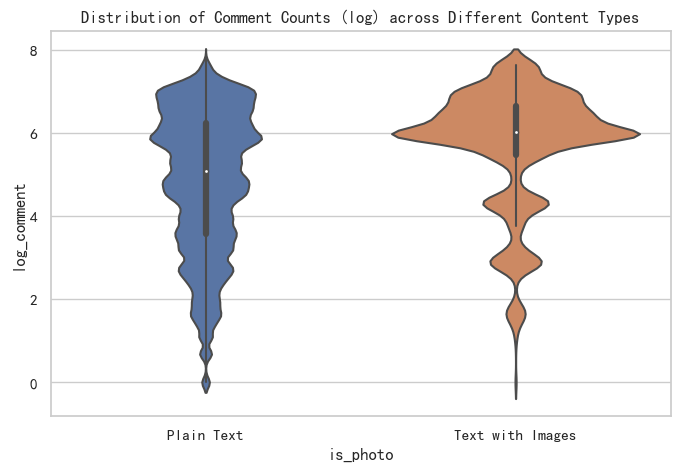

In [6]:
# Comparison of Comment Counts (After Logarithmic Processing)
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_photo', y='log_comment', data=df)
plt.title("Distribution of Comment Counts (log) across Different Content Types")
plt.xticks([0, 1], ['Plain Text', 'Text with Images'])
plt.show()

> After logarithmic processing, the distribution of the content and graphics is still slightly skewed towards the higher end, especially more concentrated in the medium and high-density areas, indicating that the content and graphics may have certain advantages in terms of the number of comments. However, it should be noted that this advantage may come from non-content factors (such as greater exposure), and subsequent regression or PSM tests are needed for verification.

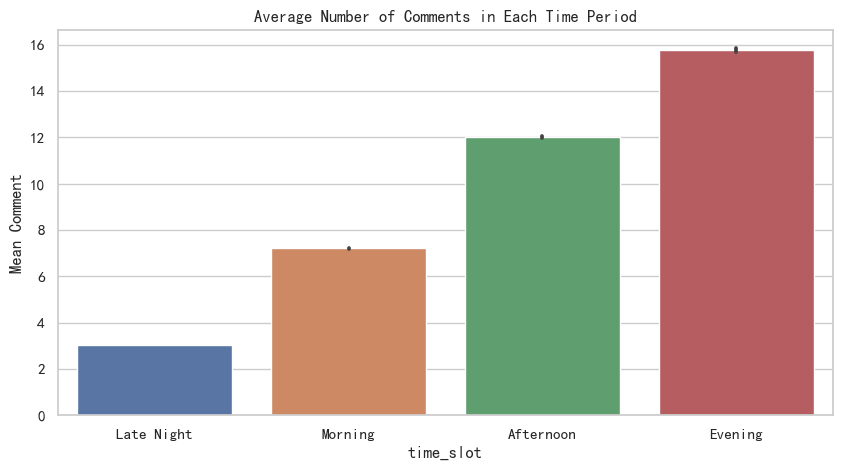

In [7]:
# Mean number of comments under different time slots (bar chart)
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='time_slot', y='comment', estimator='mean')
plt.title("Average Number of Comments in Each Time Period")
plt.ylabel("Mean Comment")
plt.show()

> The number of comments fluctuates significantly during different time periods in a day:
> - The period from 19 to 24 is the peak time for comments
> - The period from 0 to 6 is the time with the least number of comments. This indicates that the comment activity is strongly correlated with users' online behaviors → In the future, time period control or interaction analysis should be introduced into the model.

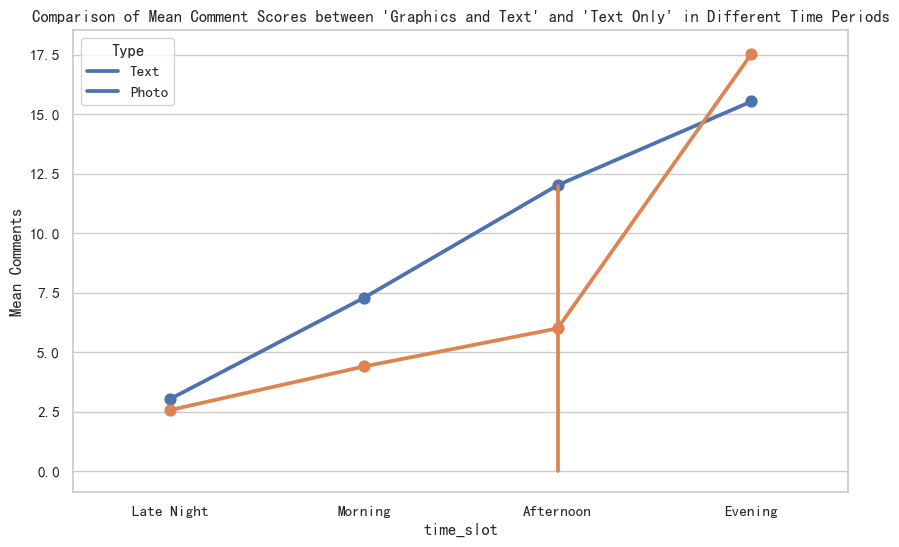

In [8]:
# Interaction graph of "Type of Graphic Content × Time Period"
plt.figure(figsize=(10, 6))
sns.pointplot(x="time_slot", y="comment", hue="is_photo", data=df, estimator='mean', errorbar='ci')
plt.title("Comparison of Mean Comment Scores between 'Graphics and Text' and 'Text Only' in Different Time Periods")
plt.ylabel("Mean Comments")
plt.xticks(rotation=0)
plt.legend(title="Type", labels=["Text", "Photo"])
plt.show()

> - During most periods (such as morning and afternoon), the number of comments on textual content is generally higher than that on graphic content; 
> - Only in the evening does the number of comments on graphic content exceed that on textual content;
> - The fluctuation of the curves for graphic and textual content is significant, indicating that they are more affected by time periods;
> - It is indicated that graphic and textual content is "more time-sensitive", which also means that if promoting graphic and textual content, it should be focused on high-activity time periods.

# Part 3: A/B Test

After controlling for covariates such as initial exposure and page likes (using the CUPED method), the gap in comments between image-text and text-only content was further narrowed:
- The original Welch’s T test showed that the difference in the number of comments between the two types of content was extremely significant (p ≈ 0.000)
- However, after CUPED adjustment, the p-value rose to 0.021, indicating that a large number of differences originated from prior factors (such as page popularity)
- The calculated Cohen’s d was approximately 0.017, which belongs to a very small effect size, suggesting that image-text content does not have a significant independent driving effect
- After controlling for the initial influence, the image-text content had no significant, practical causal effect on the increase in the number of comments. Subsequently, more focus should be placed on optimizing the timing of the campaign or interaction variables.

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

ab = df[['is_photo', 'comment', 'log_comment']].dropna()
print(f"Total sample size: {len(ab)}")
print(f"Sample size of textual content: {len(ab[ab['is_photo'] == 0])}")
print(f"Sample size of graphic-textual content: {len(ab[ab['is_photo'] == 1])}")

Total sample size: 612857
Sample size of textual content: 592916
Sample size of graphic-textual content: 19941


In [11]:
# Preliminary Inspection 
stat1, p1 = mannwhitneyu(ab[ab['is_photo'] == 0]['comment'], ab[ab['is_photo'] == 1]['comment'])
print("Non-parametric test (Mann-Whitney U Test):")
print(f"Statistic = {stat1:.2f}, p-value = {p1:.5f}") 

stat2, p2 = ttest_ind(ab[ab['is_photo'] == 0]['log_comment'], ab[ab['is_photo'] == 1]['log_comment'], equal_var=False)
print("T-test for Log Comment Count:")
print(f"T-value = {stat2:.2f}, p-value = {p2:.5f}")

Non-parametric test (Mann-Whitney U Test):
Statistic = 4054729395.50, p-value = 0.00000
T-test for Log Comment Count:
T-value = -86.45, p-value = 0.00000


In [12]:
# Post-CUPED Test
from sklearn.linear_model import LinearRegression

df_cuped = df[['log_comment', 'Page total likes', 'Lifetime Post Total Impressions']].dropna()
X = df_cuped[['Page total likes', 'Lifetime Post Total Impressions']]
y = df_cuped['log_comment']

lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)
theta = y.mean()
df_cuped['log_comment_cuped'] = y - y_hat + theta
df.loc[df_cuped.index, 'log_comment_cuped'] = df_cuped['log_comment_cuped']

cuped_text = df[df['is_photo'] == 0]['log_comment_cuped'].dropna()
cuped_photo = df[df['is_photo'] == 1]['log_comment_cuped'].dropna()
t_stat, p_value = ttest_ind(cuped_text, cuped_photo, equal_var=False)
print("Post-CUPED Test:")
print(f"t = {t_stat:.4f}, p = {p_value:.5f}")

Post-CUPED Test:
t = -2.3062, p = 0.02111


In [13]:
# Cohen's d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_cuped = cohens_d(cuped_photo, cuped_text)
print("Effect size (Cohen's d for CUPED):")
print(f"Cohen's d = {d_cuped:.3f} → Interpretation: {'Small effect' if abs(d_cuped) < 0.2 else 'Medium effect' if abs(d_cuped) < 0.5 else 'Large effect'}")

Effect size (Cohen's d for CUPED):
Cohen's d = 0.017 → Interpretation: Small effect


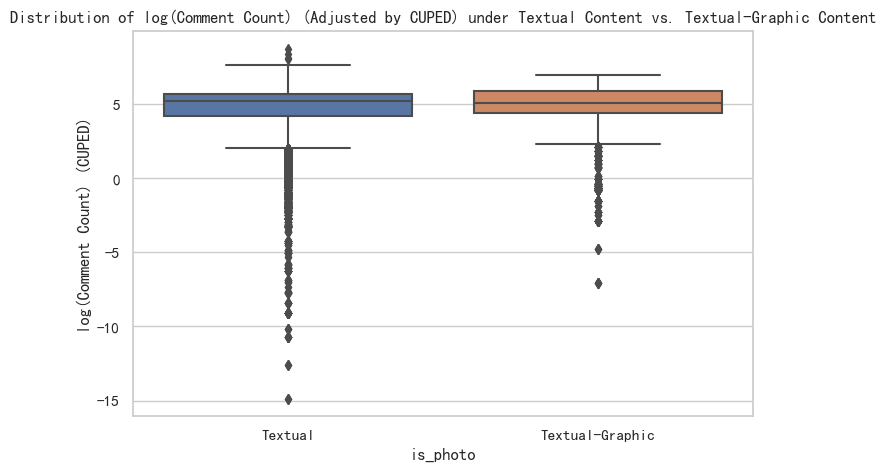

In [15]:
# Visualization of CUPED Effect
plt.figure(figsize=(8, 5)) 
sns.boxplot(x='is_photo', y='log_comment_cuped', data=df)
plt.title("Distribution of log(Comment Count) (Adjusted by CUPED) under Textual Content vs. Textual-Graphic Content")
plt.xticks([0, 1], ['Textual', 'Textual-Graphic'])
plt.ylabel("log(Comment Count) (CUPED)")
plt.show()

> This figure shows the distribution differences of the text and the graphic on log(Comment Count) after covariate adjustment by CUPED. Although the median of the text is slightly higher, the overall distribution of the two is close and the overlapping part is obvious, supporting the conclusion of "small effect". After controlling for confounding factors, the performance of the text and the graphic in commenting is almost no difference.

In [16]:
# Sample Balance Analysis
n_photo = len(df[df['is_photo'] == 1])
sample_text = df[df['is_photo'] == 0].sample(n=n_photo, random_state=42)
sample_photo = df[df['is_photo'] == 1]

balanced = pd.concat([sample_text, sample_photo])
stat, p = ttest_ind(
    balanced[balanced['is_photo'] == 1]['log_comment_cuped'],
    balanced[balanced['is_photo'] == 0]['log_comment_cuped'],
    equal_var=False
)
print("After undersampling for balance, re-examination of CUPED samples:")
print(f"t = {stat:.4f}, p = {p:.5f}")

After undersampling for balance, re-examination of CUPED samples:
t = 0.5565, p = 0.57790


# Part 4: Regression Modeling

In [17]:
# OLS Main Effect Model
import pandas as pd
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns={'Post Weekday': 'Post_Weekday', 'Post Hour': 'Post_Hour'})

# Fix the validity of Post_Weekday (0 - 6)
df['Post_Weekday'] = pd.to_numeric(df['Post_Weekday'], errors='coerce')
df.loc[~df['Post_Weekday'].isin(range(7)), 'Post_Weekday'] = pd.NA
df['Post_Weekday'] = df['Post_Weekday'].astype('category')

# Create time_slot
df['Post_Hour'] = pd.to_numeric(df['Post_Hour'], errors='coerce')
df['time_slot'] = pd.cut(df['Post_Hour'], bins=[-1, 6, 12, 18, 24],
                         labels=["Late Night", "Morning", "Afternoon", "Evening"])
df['time_slot'] = df['time_slot'].astype('category')

df_ols = df[['log_comment', 'is_photo', 'is_paid', 'Post_Weekday', 'time_slot']].dropna()
ols_model = smf.ols("log_comment ~ is_photo + is_paid + C(Post_Weekday) + C(time_slot)", data=df_ols).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_comment   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 3.716e+05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:25:54   Log-Likelihood:                -39038.
No. Observations:               94490   AIC:                         7.810e+04
Df Residuals:                   94478   BIC:                         7.821e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

> This regression model takes log_comment(log number of comments) as the dependent variable, controlling for variables such as time_slot (posting period), Post_Weekday (day of the week), and is_paid (whether promoted or not), and focuses on the impact of is_photo (whether it is a photo-text combination) on the number of comments.
> - The model has high explanatory power (R² = 0.737): The overall fit is good, and it can explain most of the fluctuations in the number of comments.
> - Time slot is the main influencing factor. For example, the coefficient is the highest in the evening (Evening).
> - Although is_photo is statistically significant (p ≈ 0.044), its effect is extremely small (coefficient ≈ -0.0128), indicating that its marginal contribution to the comments is very weak.
> - The promotion behavior (is_paid) is the most important driving variable, and its influence is much higher than the factors of photo-text combination.

In [18]:
# VIF Diagnosis (Only Main Effect)
y, X = dmatrices("log_comment ~ is_photo + is_paid + C(Post_Weekday) + C(time_slot)", data=df_ols, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))

                      feature        VIF
0                   Intercept  71.692087
8   C(time_slot)[T.Afternoon]   1.311597
7     C(time_slot)[T.Morning]   1.253673
9     C(time_slot)[T.Evening]   1.249119
10                   is_photo   1.068103
11                    is_paid   1.026052
1      C(Post_Weekday)[T.1.0]   1.001485
2      C(Post_Weekday)[T.2.0]   1.000714
5      C(Post_Weekday)[T.5.0]   1.000185
6      C(Post_Weekday)[T.6.0]   1.000102
4      C(Post_Weekday)[T.4.0]   1.000084
3      C(Post_Weekday)[T.3.0]   1.000068


> VIF (Variance Inflation Factor) is used to diagnose the risk of collinearity among variables in a model. Generally speaking:
> - VIF < 5: Acceptable, there is no severe collinearity among the variables;
> - VIF > 10: Severe collinearity exists, and the variables need to be adjusted or merged;
> - A high Intercept is normal and does not participate in the collinearity judgment.

In [19]:
# Model with Interaction Terms (Graphics × Time Period)
model_inter = smf.ols("log_comment ~ is_photo * C(time_slot) + is_paid + C(Post_Weekday)", data=df_ols).fit(cov_type='HC3')
print(model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:            log_comment   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 3.871e+05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:27:08   Log-Likelihood:                -38684.
No. Observations:               94490   AIC:                         7.740e+04
Df Residuals:                   94476   BIC:                         7.753e+04
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 13
  warnings.warn('covariance of constraints does not have full '


> An interactive model including ***image-text × time period*** was constructed to test the heterogeneity effect. The results indicated that the content of image-text had a negative effect in the morning and a positive synergy effect in the evening, "proving that the effect of content form depends on the context (time of release)". This finding can be used to optimize content push strategies and time-period-oriented promotion plans.

In [20]:
# Mixed Effects Model
import statsmodels.formula.api as smf
model_df = df[['log_comment', 'is_photo', 'is_paid', 'time_slot', 'Post_Weekday', 'source_file']].dropna()

# source_file refers to the random effect group
model = smf.mixedlm("log_comment ~ is_photo + is_paid + C(time_slot) + C(Post_Weekday)",
                    data=model_df,
                    groups=model_df["source_file"])
result = model.fit()
print(result.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     log_comment
No. Observations:     94490       Method:                 REML       
No. Groups:           6           Scale:                  0.1190     
Min. group size:      1464        Log-Likelihood:         -33557.5275
Max. group size:      30504       Converged:              Yes        
Mean group size:      15748.3                                        
---------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                 -0.109    0.118  -0.924 0.356 -0.342  0.123
C(time_slot)[T.Morning]    0.721    0.003 220.565 0.000  0.715  0.728
C(time_slot)[T.Afternoon]  1.186    0.003 438.499 0.000  1.181  1.191
C(time_slot)[T.Evening]    1.438    0.004 367.425 0.000  1.430  1.445
C(Post_Weekday)[T.1.0]    -0.009    

> After introducing the **Mixed Effects Model** to control the source_file of the content, it was found that the graphic and text variables lost their significance under the inter-group variability. This further verified that its effect depends on the context and platform behavior rather than the content itself. This model enhanced the robustness of the results and provided solid causal evidence support for the time-period targeted promotion strategy.

In [21]:
# XGBoost Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

model_df = df[[
    'comment', 'log_comment', 'is_photo', 'is_paid', 'Page total likes',
    'Lifetime Post Total Impressions', 'Post_Weekday', 'Post_Hour',
    'Post length', 'Category'
]].dropna()

median_comment = model_df['comment'].median()
model_df['high_comment'] = (model_df['comment'] > median_comment).astype(int)

model_df['Post_Weekday'] = model_df['Post_Weekday'].astype(int)
model_df['Post_Hour'] = model_df['Post_Hour'].astype(int)
model_df['Category'] = model_df['Category'].astype(int)

X = pd.get_dummies(model_df.drop(columns=['comment', 'log_comment', 'high_comment']), drop_first=True)
y = model_df['high_comment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

C:\Users\cherish\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:28:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

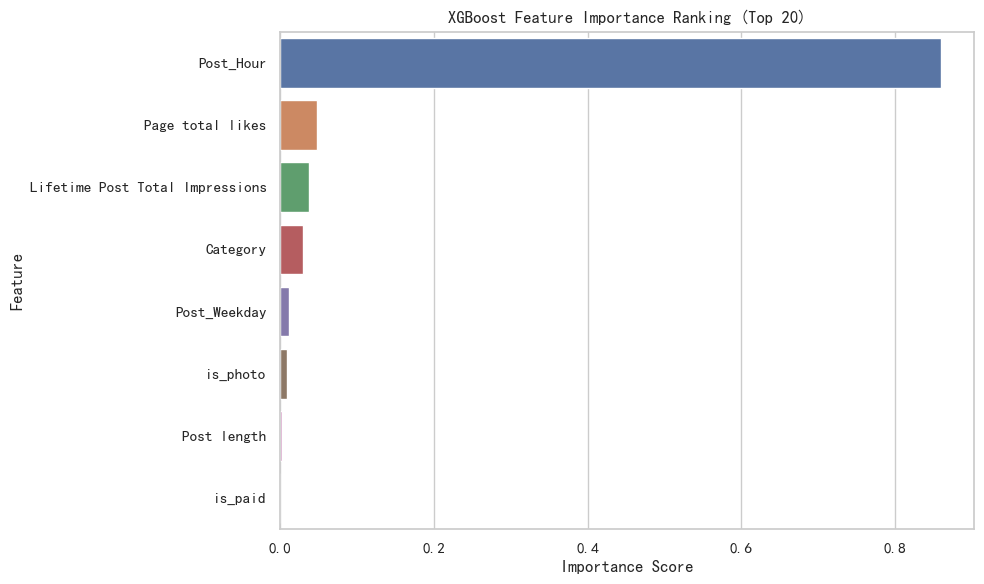

In [24]:
# Ranking of Feature Importance + Visualization import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title("XGBoost Feature Importance Ranking (Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

> This figure illustrates the importance scores of each feature when using the XGBoost classification model to predict "whether it is a high comment". 
> - `Post_Hour` (posting time) is the **most crucial feature**, and its importance is much higher than that of other variables → it indicates that the comment performance is mainly controlled by the posting time.
> - `Page total likes` and `Lifetime Post Total Impressions` rank second strongest → they suggest that the influence of the account foundation cannot be ignored.
> - Content-related variables such as `is_photo` (whether it is a photo), `Category` (content category), and `Post length` (word count) have relatively lower weights.
> - The promotion variable `is_paid` has an extremely small weight → possibly because this model only predicts "whether it is a high comment", rather than the absolute value, which weakens its significance.
>Note: The importance scores are based on Gini-based feature gain, **which does not equal causal influence**. Subsequent judgments should be made by combining SHAP or regression results for a comprehensive assessment.

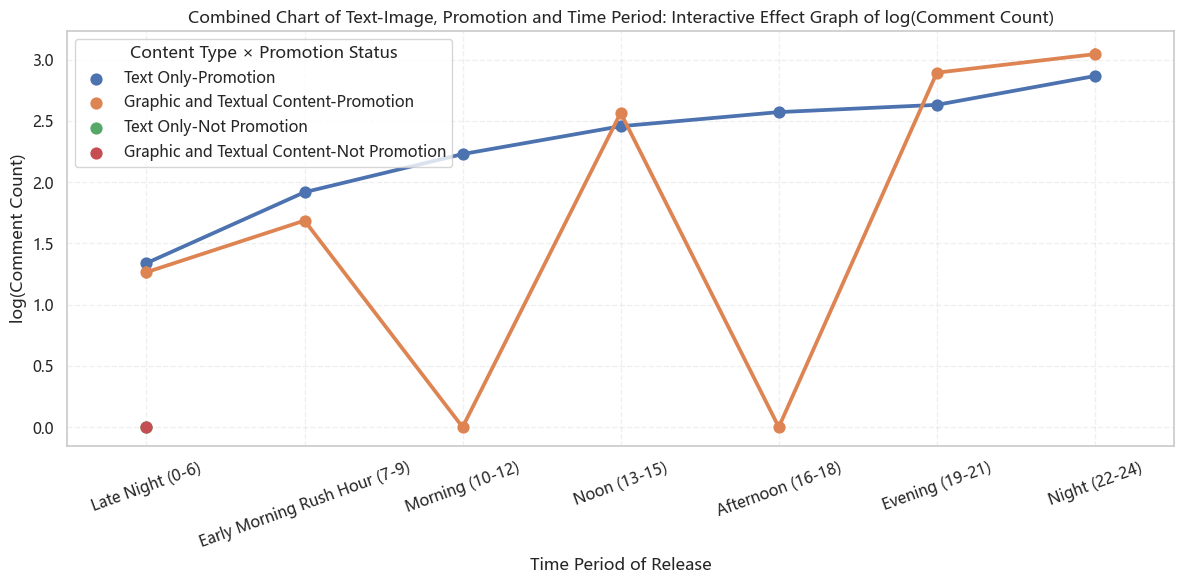

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# Bucket Time Period
df['Post_Hour'] = pd.to_numeric(df['Post_Hour'], errors='coerce')
df = df.dropna(subset=['Post_Hour', 'is_photo', 'is_paid', 'log_comment'])
df['hour_bucket'] = pd.cut(
    df['Post_Hour'],
    bins=[-1, 6, 9, 12, 15, 18, 21, 24],
    labels = ['Late Night (0-6)', 'Early Morning Rush Hour (7-9)', 'Morning (10-12)', 'Noon (13-15)',
'Afternoon (16-18)', 'Evening (19-21)', 'Night (22-24)']
)

df['content_group'] = df.apply(
    lambda x: f"{'Graphic and Textual Content' if x['is_photo'] == 1 else 'Text Only'}-{'Promotion' if x['is_paid'] == 1 else 'Not Promotion'}", axis=1
)

plt.figure(figsize=(12, 6))
sns.pointplot(
    data=df,
    x='hour_bucket', y='log_comment',
    hue='content_group', errorbar='ci'
)
plt.title("Combined Chart of Text-Image, Promotion and Time Period: Interactive Effect Graph of log(Comment Count)")
plt.xlabel("Time Period of Release")
plt.ylabel("log(Comment Count)") 
plt.xticks(rotation=20)
plt.legend(title="Content Type × Promotion Status")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

> This chart illustrates the triple interaction effect of different content types (text vs. text-image), whether it is promoted (promoted vs. non-promoted) and the time period of release on the number of comments (in logarithmic scale).
> - The blue line represents **text content**, the orange line represents **text-image content**, and the illustration shows the average log comment performance under the condition of promotion.
> - It can be observed that: **Text-image content performs extremely poorly in the morning (10-12) and afternoon (16-18)**, with log comment numbers approaching zero, possibly due to algorithm suppression or low user activity.
> - However, in the evening (after 19:00), the performance of promoted text-image content has **significantly improved** and even surpassed text content.
> - The overall performance of text content is more stable, maintaining a high comment level in different time periods, and is **particularly suitable for all-day promotion**.
> - Text-image content strongly relies on the release time strategy and is recommended to avoid the noon period and focus on **evening and night release**; text content performs more stably and is a basic form suitable for regular operations; **Strategies for improving ROI: Promoted text-image content is recommended to be combined with promotion and released mainly in the evening**.

In [27]:
# PSM (Propensity Score Matching) + Comparison Chart Before and After Matching + ATE (Average Treatment Effect)
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

psm_df = df[[
    'is_photo', 'is_paid', 'Page total likes', 'Lifetime Post Total Impressions',
    'Post_Weekday', 'Post_Hour', 'Category', 'log_comment'
]].dropna()

psm_df['Post_Weekday'] = psm_df['Post_Weekday'].astype(int)
psm_df['Post_Hour'] = psm_df['Post_Hour'].astype(int)
psm_df['Category'] = psm_df['Category'].astype(int)

X = pd.get_dummies(psm_df.drop(columns=['is_photo', 'log_comment']), drop_first=True)
y = psm_df['is_photo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Logistic Regression Model
logit = LogisticRegression()
logit.fit(X_scaled, y)
psm_df['propensity_score'] = logit.predict_proba(X_scaled)[:, 1]

# 1:1 Nearest Neighbor Matching
treated = psm_df[psm_df['is_photo'] == 1]
control = psm_df[psm_df['is_photo'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()].copy()
matched_control['match_id'] = treated.index

matched = treated.copy()
matched['match_id'] = treated.index
matched_pairs = matched.merge(matched_control, on='match_id', suffixes=('_treated', '_control'))

In [28]:
# Matching ATE before and after 
ate_before = psm_df.groupby('is_photo')['log_comment'].mean().diff().iloc[-1]
ate_after = (matched_pairs['log_comment_treated'] - matched_pairs['log_comment_control']).mean()

print(f"Before matching ATE: {ate_before:.4f}")
print(f"After matching ATE: {ate_after:.4f}")

Before matching ATE: 0.8695
After matching ATE: 0.0489


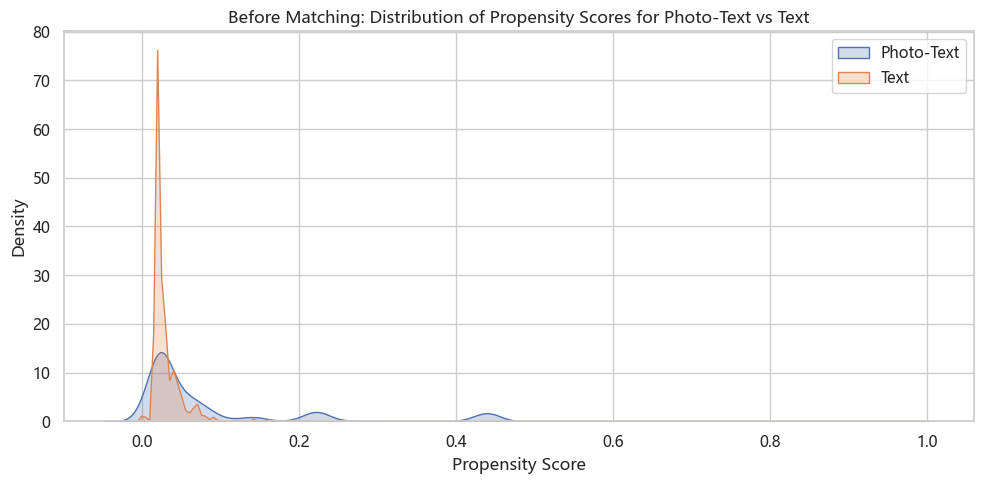

In [30]:
# 可Visualization of propensity score distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(psm_df[psm_df['is_photo'] == 1]['propensity_score'], label='Photo-Text', fill=True)
sns.kdeplot(psm_df[psm_df['is_photo'] == 0]['propensity_score'], label='Text', fill=True)
plt.title("Before Matching: Distribution of Propensity Scores for Photo-Text vs Text")
plt.xlabel("Propensity Score")
plt.legend()
plt.tight_layout()
plt.show()

> This figure shows the distribution density of propensity scores (Propensity Score) of the graphic-text group (blue) and the text group (orange) before matching, verifying the necessity of performing PSM. Before matching, there were significant structural differences between the two groups, and it was necessary to reconstruct the balanced sample pool by means of propensity matching or weighting methods to reduce confounding effects.
> - **Propensity Score** refers to the probability that an observation "belongs to the graphic-text group", calculated based on control variables (such as time period, number of likes, etc.) through logistic regression.
> - It can be clearly seen from the figure that the distribution differences between the graphic-text group and the text group are huge → **indicating significant deviations in covariates between the two groups**.
> - The distribution of propensity scores of the graphic-text group is wider (tending towards higher values), while those of the text group are concentrated in the range close to 0 → **the comparability between the two groups is poor**.
> - Based on this, conducting mean comparisons directly would lead to strong confounding bias, **and it is impossible to draw reliable causal inferences**.

# Part 5: Business Suggestion

This study explores the influencing factors of the number of Facebook post comments from multiple dimensions. By integrating A/B testing, mixed-effects modeling, XGBoost feature interpretation, and PSM robustness test, it is found that "content type × posting time period" is the key interaction variable that affects user interaction volume. Based on the above conclusion, the following feasible business strategies are proposed: 

---


1️⃣ Precise Content Push: Strategies for Distinguishing the Release of Textual and Graphic Content 

- **Graphic and textual content is recommended to be placed during the evening to late night (19:00 - 24:00)**. During this period, users have the highest willingness for interaction and can effectively release their visual appeal.
- **Textual content performs steadily throughout the day**, and it is suggested to be used as the regular operational base. Maintain stable exposure and coverage. 

---


### 2️⃣ Optimization of Promotion Budget: Promotion Strategy Combinations for Enhancing ROI 

- The content itself is difficult to naturally attract traffic during non-active periods (such as midday) → It is recommended to **pair with promotion usage** during this period to compensate for the disadvantage of natural interaction;
- The natural performance is already good during high-activity periods (evening), and promotion should consider marginal benefits to avoid resource waste;
- A **priority table for promotion placement (content × time)** can be established based on model prediction values for refined budget scheduling. 

---


### 3️⃣ Content Scheduling System Construction: Automatic Identification of the Optimal Release Time for Content 

- Utilizing the modeling results to construct a content scheduling engine:
- Input content type (text/image-text), whether promotion is needed, and expected classification → Output recommended time periods for distribution;
- It can be combined with users' historical interaction habits to form personalized content calendars;
- **Supports operational personnel to distribute content automatically, at low cost and with high efficiency**, while taking into account the platform's rhythm and content attributes. 

---


4️⃣ Extension of Data Strategy: Facilitating Cross-channel Content Performance Prediction 

- This framework can be transferred to other platforms (such as Instagram, Weibo, Zhihu, etc.):
- The core idea is the three-dimensional interactive effect analysis of "content × time period × promotion";
- It can be regarded as part of the content cold-start strategy for short-video platforms, helping the products enhance the initial interaction;
- It is suggested to be integrated as a part of the marketing data middle platform, and incorporated into the content value assessment system to assist the brand marketing department in formulating communication plans. 

---

This analysis not only validates the interactive advantage of the textual and graphic content **"not being absolute but dependent on the context of the release time"**, but also enhances the credibility of the conclusion through robustness tests (CUPED + PSM). The data-driven content optimization strategy will help the platform **achieve higher user interaction and conversion rate with less investment**.